In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import numpy as np
import pandas as pd

In [5]:
from ast import literal_eval
train = pd.read_csv('train.csv', encoding='utf-8', converters={'clean_body': literal_eval})
test = pd.read_csv('test.csv', encoding='utf-8', converters={'clean_body': literal_eval})

In [6]:
train

,Unnamed: 0,category,clean_body
0,43313,4,"[sent, thursday, blocked, mails, hello, collea..."
1,13008,4,"[wednesday, july, pm, mailbox, almost, importa..."
2,8094,4,"[opportunity, code, hi, please, add, opportuni..."
3,14603,4,"[thursday, pm, removal, hello, decommissioned,..."
4,42338,4,"[sent, monday, timecard, hello, hours, set, au..."
...,...,...,...
96521,22245,0,"[sent, wednesday, july, sensible, information,..."
96522,22246,0,"[sent, wednesday, july, sensitive, information..."
96523,22247,0,"[sent, wed, july, sensitive, information, acce..."
96524,22248,0,"[sent, wednesday, july, sensitive, information..."


In [7]:
test

,Unnamed: 0,body,category,clean_body
0,10166,hello name problem logging tried logging work ...,4,"[hello, name, problem, logging, tried, logging..."
1,18053,friday leaver form leave date location center ...,4,"[friday, leaver, form, leave, date, location, ..."
2,32083,tuesday pm document purchase order requisition...,5,"[tuesday, pm, document, purchase, order, requi..."
3,15529,card hello please reassign badge cleaning she ...,4,"[card, hello, please, reassign, badge, cleanin..."
4,9558,forwarder calendar organizer rights card hello...,4,"[forwarder, calendar, organizer, rights, card,..."
...,...,...,...,...
14560,36997,question about job dear please message bellow ...,4,"[question, job, dear, please, message, bellow,..."
14561,29558,friday pm ad groups rename hello please rename...,4,"[friday, pm, ad, groups, rename, hello, please..."
14562,5856,re updated bandwidth upgrade hello please kind...,6,"[updated, bandwidth, upgrade, hello, please, k..."
14563,14913,wednesday pm questions dear several questions ...,4,"[wednesday, pm, questions, dear, several, ques..."


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
#tf.keras.callbacks.ModelCheckpoint

In [9]:
# Create X_train, X_test, y_train , y_test

X_train = pd.DataFrame(train['clean_body'])
y_train = train['category']

X_test = pd.DataFrame(test['clean_body'])
y_test =test['category']

In [10]:
X = pd.concat([X_train, X_test], axis = 0)
X

,clean_body
0,"[sent, thursday, blocked, mails, hello, collea..."
1,"[wednesday, july, pm, mailbox, almost, importa..."
2,"[opportunity, code, hi, please, add, opportuni..."
3,"[thursday, pm, removal, hello, decommissioned,..."
4,"[sent, monday, timecard, hello, hours, set, au..."
...,...
14560,"[question, job, dear, please, message, bellow,..."
14561,"[friday, pm, ad, groups, rename, hello, please..."
14562,"[updated, bandwidth, upgrade, hello, please, k..."
14563,"[wednesday, pm, questions, dear, several, ques..."


In [11]:
Y= pd.concat([y_train, y_test], axis = 0)
Y

0        4
1        4
2        4
3        4
4        4
        ..
14560    4
14561    4
14562    6
14563    4
14564    4
Name: category, Length: 111091, dtype: int64

In [12]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X['clean_body'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 17599 unique tokens.


In [13]:
X = tokenizer.texts_to_sequences(X['clean_body'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
X

Shape of data tensor: (111091, 250)


array([[   0,    0,    0, ...,  151, 1779,   48],
       [   0,    0,    0, ...,  704,   55,   19],
       [   0,    0,    0, ...,   47, 2093, 3704],
       ...,
       [   0,    0,    0, ...,  146,    5,   84],
       [   0,    0,    0, ...,  307,    5,  366],
       [   0,    0,    0, ...,    1,   20,    5]], dtype=int32)

In [14]:
Y = pd.get_dummies(Y).values
print('Shape of label tensor:', Y.shape)
Y

Shape of label tensor: (111091, 4)


array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0]], dtype=uint8)

In [15]:
X_train = X[:len(X_train)]
X_test = X[len(X_train):]
y_train = Y[:len(y_train)]
y_test = Y[len(y_train):]

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(96526, 250) (96526, 4)
(14565, 250) (14565, 4)


In [16]:
y_test

array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0]], dtype=uint8)

In [18]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, unroll = True))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 250, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 4)                 404       
                                                                 
Total params: 5,080,804
Trainable params: 5,080,804
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=7, batch_size=128)

Epoch 1/7
755/755 [==============================] - 410s 350ms/step - loss: 0.6303 - accuracy: 0.7682 - val_loss: 0.4340 - val_accuracy: 0.8541
Epoch 2/7
755/755 [==============================] - 243s 322ms/step - loss: 0.3883 - accuracy: 0.8648 - val_loss: 0.4545 - val_accuracy: 0.8370
Epoch 3/7
755/755 [==============================] - 242s 320ms/step - loss: 0.3240 - accuracy: 0.8871 - val_loss: 0.3962 - val_accuracy: 0.8567
Epoch 4/7
755/755 [==============================] - 249s 329ms/step - loss: 0.2841 - accuracy: 0.8997 - val_loss: 0.3985 - val_accuracy: 0.8565
Epoch 5/7
755/755 [==============================] - 261s 345ms/step - loss: 0.2538 - accuracy: 0.9111 - val_loss: 0.4030 - val_accuracy: 0.8580
Epoch 6/7
755/755 [==============================] - 254s 336ms/step - loss: 0.2360 - accuracy: 0.9167 - val_loss: 0.3847 - val_accuracy: 0.8638
Epoch 7/7
755/755 [==============================] - 243s 322ms/step - loss: 0.2100 - accuracy: 0.9262 - val_loss: 0.4360 - val_ac

In [20]:
model.save_weights('model1')

# to load it 
# from tensorflow import keras
# model = keras.models.load_model('path/to/location')

In [21]:
# Function to test models

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate(test_y, predicted_y):
    
    categories = [0,4,5,6]
    
    cm = confusion_matrix(test_y, predicted_y)
    fp = cm.sum(axis=0) - np.diag(cm) 
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    fp = fp.astype(float)
    fn = fn.astype(float)
    tp = tp.astype(float)
    tn = tn.astype(float)
    
    # Precision or positive predictive value
    precision = tp/(tp+fp)
    print('Precision: ', sum(precision)/len(categories))
    
    # Recall
    recall = tp/(tp+fn)
    print('Recall: ', sum(recall)/len(categories))
    
    # F1-Score
    F1_Score = 2*precision*recall/(precision + recall)
    print('F1-Score: ',  sum(F1_Score)/len(categories))
    
    # Sensitivity
    print('Sensitivity: ', sum(recall)/len(categories))
    
    # Specificity
    specificity = tn/(tn+fp)
    print('Specificity: ', sum(specificity)/len(categories))
    
    # Overall accuracy for each class
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    print('Accuracy: ', sum(accuracy)/len(categories))
    
    # Print Confusion Matrix
    cmd = ConfusionMatrixDisplay(cm, display_labels=categories)
    cmd.plot()
    cmd.ax_.set(xlabel='Predicted', ylabel='True')

In [24]:
y_pred = np.argmax(model.predict(X_test), axis=1)

In [35]:
y_pred.shape

(14565,)

Precision:  0.8256634127267282
Recall:  0.7202398242243897
F1-Score:  0.7615757406979875
Sensitivity:  0.7202398242243897
Specificity:  0.9179943211708413
Accuracy:  0.9273257809818056


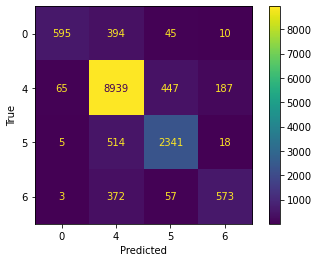

In [36]:
evaluate(y_pred, np.argmax(y_test, axis=1))